In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

In [24]:
from sklearn.datasets import make_blobs

In [25]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [26]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [27]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

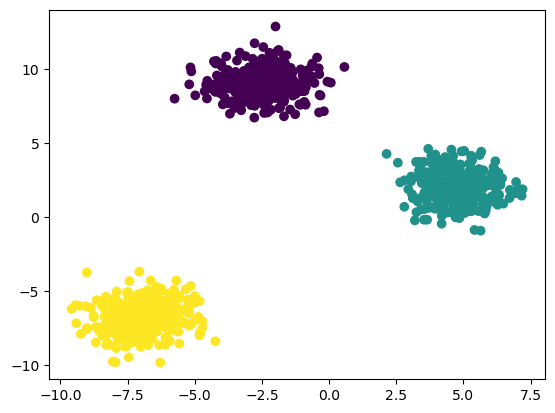

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.cluster import KMeans

In [33]:
##Elbow method to select k value

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [34]:
wcss

[1340.0,
 424.7795042841271,
 43.537817283488835,
 36.755326197789756,
 30.9337944203664,
 25.843554980920068,
 23.40436935461525,
 21.471414335186555,
 19.089983394603493,
 17.23142550114657]

Text(0, 0.5, 'WCSS')

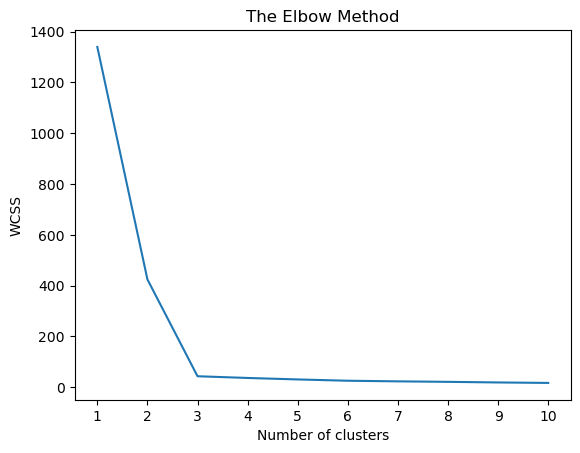

In [35]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

plt.title("The Elbow Method")

plt.xlabel("Number of clusters")

plt.ylabel("WCSS")

In [36]:
## We get k = 3

In [37]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42)

In [38]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2,

In [39]:
y_pred = kmeans.predict(X_test_scaled)

In [40]:
y_pred

array([2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1,

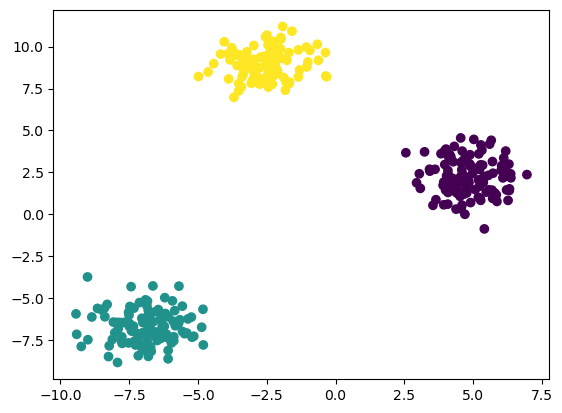

In [41]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [42]:
## Validating the k value 
##knee locator
##silhoutee scoring

In [43]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve='convex',directions='decreasing')

ModuleNotFoundError: No module named 'kneed'